# EXPLORATORY DATA ANALYSIS

### Loading in my Libraries & importing my data

In [2]:
import pandas as pd
import requests
import json
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
import numpy as np
import time
np.random.seed(42)

from sklearn.feature_extraction import stop_words

import matplotlib.pyplot as plt

/Users/benjaminnew/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/benjaminnew/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
full_data = pd.read_csv('../Data/stock_crypto_data.csv')
stock_data = pd.read_csv('../Data/stock_text_title.csv')
crypto_data = pd.read_csv('../Data/crypto_text_title.csv')

In [4]:
full_data.head(3)

,selftext,title,subreddit,y
0,NaN,The Official r/StockMarket Discord Live Chat Room,StockMarket,1
1,NaN,Most Anticipated Earnings Releases for the tra...,StockMarket,1
2,"I'm sure there are many links, but here's the ...",Amazon becomes world's second $1tn company,StockMarket,1


### Dropping the 'subreddit' column since I already the numerical values for the subreddits named 'y'
#### Transferring the data added Null values in my dataframe, so I am filling them with an empty space

In [5]:
model_data = full_data.drop(columns = 'subreddit', axis = 1)

In [6]:
model_data.isnull().sum()

selftext    1091
title          0
y              0
dtype: int64

In [7]:
crypto_data.selftext.fillna(' ', inplace = True)
stock_data.selftext.fillna(' ', inplace = True)
full_data.selftext.fillna(' ', inplace = True)

### Listing my English stop words along with my custom stopwords
##### ~Stop words wont include the specified words in the model 

In [8]:
my_sw = list(stop_words.ENGLISH_STOP_WORDS) + ['stock','stocks','cryptocurrency','cryptocurrencies', 'crypto'
             'https', 'io','fintel','amp','com','13d','8209','08','gt','www','000','http','07',
             'x200b','daex', 'click']

# Definined a function to CountVectorize my data & output my top 20 words 

#### I added custom stop words that were descretly related to the market    -----ex( stock, stocks, crypto, cryptocurrency)
#### I did this in order to view distinct words that each market used

In [9]:
def top_20_words(df, content):
    corpus = list(df[content])
    
    count_vec = CountVectorizer(stop_words=my_sw)
    corpus_ft = count_vec.fit_transform(corpus)
    df_from_corpus = pd.DataFrame(corpus_ft.toarray(), columns = count_vec.get_feature_names())
    content = df_from_corpus.sum().sort_values(ascending = False).head(20)
    
    return content

In [10]:
crypto_title_20 = pd.DataFrame(top_20_words(crypto_data, 'title'))

In [11]:
stock_title_20 = pd.DataFrame(top_20_words(stock_data, 'title'))

In [12]:
stock_text_20 = pd.DataFrame(top_20_words(stock_data, 'selftext'))

In [13]:
crypto_text_20 = pd.DataFrame(top_20_words(crypto_data, 'selftext'))

## Visualizing my Top 20 words in my Opposing Subreddits
### One graph for 'Title' Words and other for 'Selftext' words

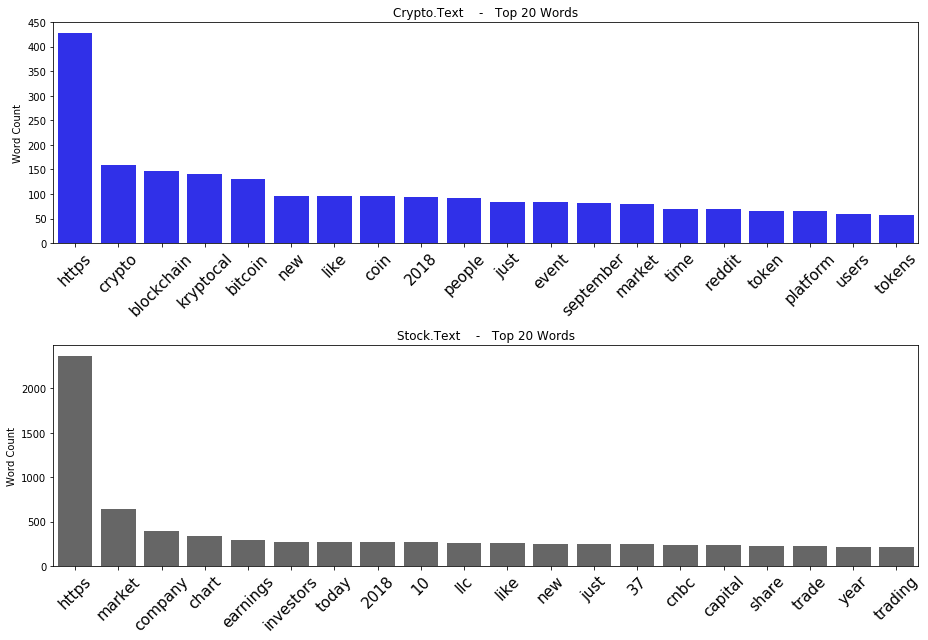

In [14]:
figure, ax = plt.subplots(nrows = 2, ncols =1, figsize = (13,9))
plt.sca(ax[0])
plt.title('Crypto.Text    -   Top 20 Words')
locs, labels = plt.xticks(fontsize=15)
plt.setp(labels, rotation=45)
sns.barplot(x=crypto_text_20.index, y= crypto_text_20[0], color= 'blue', alpha = .9, saturation = .8)
plt.ylabel('Word Count')
plt.tight_layout();

plt.sca(ax[1])
plt.title('Stock.Text    -   Top 20 Words')
locs, labels = plt.xticks(fontsize=15)
plt.setp(labels, rotation=45)
sns.barplot(x=stock_text_20.index, y= stock_text_20[0], data=stock_title_20, color= 'black', alpha = .6, saturation = .8)
plt.ylabel('Word Count')
plt.tight_layout();

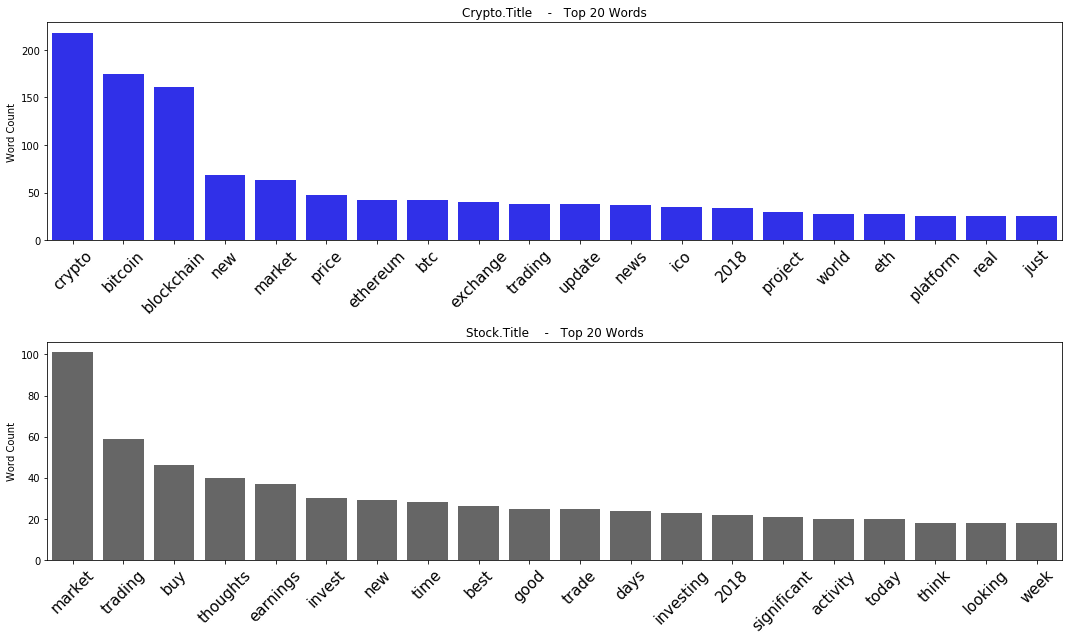

In [15]:
figure, ax = plt.subplots(nrows = 2, ncols =1, figsize = (15,9))
plt.sca(ax[0])
plt.title('Crypto.Title    -   Top 20 Words')
locs, labels = plt.xticks(fontsize=15)
plt.setp(labels, rotation=45)
sns.barplot(x=crypto_title_20.index, y= crypto_title_20[0], color= 'blue', alpha = .9, saturation = .8)
plt.ylabel('Word Count')
plt.tight_layout();

plt.sca(ax[1])
plt.title('Stock.Title    -   Top 20 Words')
locs, labels = plt.xticks(fontsize=15)
plt.setp(labels, rotation=45)
sns.barplot(x=stock_title_20.index, y= stock_title_20[0], color= 'black', alpha = .6, saturation = .8)
plt.ylabel('Word Count')
plt.tight_layout();

## Defined a function to view top 100 words of each Subreddit

### This time I removed my custom stop words in order to compare if my subreddits mentioned each others markets

In [16]:
def top_words(df, content):
    corpus = list(df[content])
    
    count_vec = CountVectorizer(stop_words='english')
    corpus_ft = count_vec.fit_transform(corpus)
    df_from_corpus = pd.DataFrame(corpus_ft.toarray(), columns = count_vec.get_feature_names())
    content = df_from_corpus.sum().sort_values(ascending = False).head(100)
    
    return content

In [17]:
sw = list(pd.DataFrame(top_words(crypto_data, 'title')).index)

In [18]:
cw  = list(pd.DataFrame(top_words(stock_data, 'title')).index)

In [19]:
common_words = []
for name in sw:
    if name in cw:
        common_words.append(name)

## Gathered the top 20 identical words

In [20]:
pd.DataFrame(common_words , columns = ['Common words']).head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Common words,new,market,price,amp,trading,news,2018,just,week,time,10,need,buy,help,today,etf,technology,live,right,think


# My hypothesis was that these two subreddits would constantly compare themeselves to the opposing market.
##  What I gathered from my indentical words is that these subreddits don't mention or compare themselves at all  